In [100]:
# Import necessary libraries

# Your code here
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix

In [101]:
# Read the datafile "covid_train.csv"
df_train = pd.read_csv('covid_train.csv')

# Take a quick look at the dataframe
df_train.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30,1,0,0,0,0,0,0,0
1,47,1,0,0,0,0,0,0,0
2,49,1,0,0,0,0,0,0,0
3,50,0,0,0,0,0,0,0,0
4,59,0,0,1,0,0,0,0,0


In [102]:
# Read the datafile "covid_test.csv"
df_test = pd.read_csv('covid_test.csv')

# Take a quick look at the dataframe
df_test.isnull().sum()


age            0
sex            0
cough          0
fever          0
chills         0
sore_throat    0
headache       0
fatigue        0
Urgency        0
dtype: int64

In [103]:
# TODO: feature scaling

In [104]:
# Get the train predictors
X_train = df_train.drop('Urgency', axis=1)

# Get the train response variable
y_train = df_train['Urgency']

In [105]:
# Get the test predictors
X_test = df_test.drop('Urgency', axis=1)

# Get the test response variable
y_test = df_test['Urgency']


In [106]:
### edTest(test_model) ###

# Define a kNN classification model with k = 7
knn_model = KNeighborsClassifier(n_neighbors=7)

# Fit the above model on the train data
knn_model.fit(X_train, y_train)

# Define a Logistic Regression model with max_iter as 10000 and C as 0.1 (leave all other parameters at default values)
log_model = LogisticRegression(max_iter=10000, C=0.1)

# Fit the Logistic Regression model on the train data
log_model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


Now it is time to evaluate the models.

Create a dictionary called `metric_scores` which has keys `'Accuracy'`, `'Recall'`, `'Specificity'`, `'Precision'`, and `'F1-score'`. The value associated with each key should a list with a length 2, the first element being knn_model corresponding metric score and the second element being log_model corresponding metric score. All scores should be made on the **test** data.

Ex: metric_scores["F1-score"] = [knn_f1,log_f1]

In [107]:
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

def precision(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp+fp)

In [108]:
# Your code here

metric_score_names = [
    'Accuracy', 
    'Recall', 
    'Specificity', 
    'Precision', 
    'F1-score'
    ]

metrics_score_funcs = [
    accuracy_score,
    recall_score,
    specificity,
    precision,
    f1_score
]

metrics = dict(zip(metric_score_names, metrics_score_funcs))

metric_scores = {}

y_pred_knn = knn_model.predict(X_test)
y_pred_lreg = log_model.predict(X_test)

preds = [y_pred_knn, y_pred_lreg]

for metric_name, metric_function in metrics.items():
    sublist = []
    for y_pred in preds:
        sublist.append(metric_function(y_test, y_pred))

    metric_scores[metric_name] = sublist

data = pd.DataFrame(metric_scores, index=['knn_model', 'log_model'])

data

,Accuracy,Recall,Specificity,Precision,F1-score
knn_model,0.633466,0.671642,0.589744,0.652174,0.661765
log_model,0.617530,0.723881,0.495726,0.621795,0.668966


(0.0, 1.0)

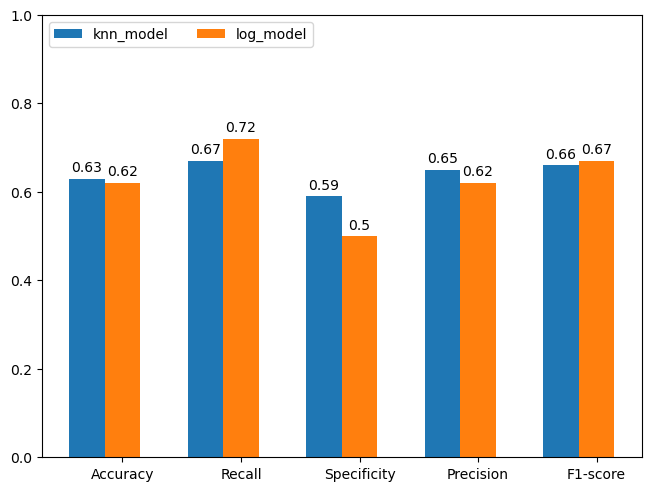

In [109]:
### edTest(test_metrics) ###

# Display your results
fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(data.columns))
width = 0.3
multiplier = 0

for model, measurement in data.round(2).iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = model)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(x + width, data.columns)
ax.set_ylim(0, 1)